In [213]:
import pandas as pd
import pandapower as pp

In [214]:
import pandapower.networks as nw
net= nw.create_cigre_network_mv()

In [215]:
net

This pandapower network includes the following parameter tables:
   - bus (15 elements)
   - load (18 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (2 elements)
   - bus_geodata (15 elements)

In [216]:
pp.runpp(net)

In [217]:
net.res_trafo.loading_percent

0    101.411473
1     84.698048
Name: loading_percent, dtype: float64

In [218]:
net.res_line.loading_percent

0     96.482978
1     96.958807
2     37.580668
3     28.091021
4     12.122901
5      1.936801
6     33.550914
7     19.476278
8      7.294089
9     48.143637
10     9.476242
11     8.908939
12     0.084082
13     0.171049
14     0.037287
Name: loading_percent, dtype: float64

In [219]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.030000,0.000000,-45.045732,-16.341411
1,0.991972,-6.556771,19.839000,4.637136
2,0.968147,-7.604191,0.000000,0.000000
3,0.930961,-9.330960,0.501700,0.208882
4,0.929098,-9.434973,0.431650,0.108182
5,0.927823,-9.506622,0.727500,0.182329
6,0.926321,-9.591791,0.548050,0.137354
7,0.925122,-9.589560,0.076500,0.047410
8,0.925404,-9.578992,0.586850,0.147078
9,0.924422,-9.619167,0.573750,0.355578


In [220]:
vmax=1.1
vmin=0.9
max_ll=100
critical=list()
pp.runpp(net)

lines = net.line.index

for l in lines:

    net.line.loc[l, "in_service"] = False
    pp.runpp(net)
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        critical.append(l)
    net.line.loc[l, "in_service"] = True
    
print(critical)

[]


-----------------------------    STEP 1.2    -----------------------
[]
-----------------------------    STEP 1.3    -----------------------



Disconnected line
3
overvoltage
([], [])
Undervoltage
([7, 8, 9, 10, 11], [0.9466290157670735, 0.9469028923440268, 0.9459434068056938, 0.9447252950558179, 0.9445362105813122])
Overloaded
([], [])

Disconnected line
4
overvoltage
([], [])
Undervoltage
([3, 4, 5, 7, 8, 9, 10, 11], [0.9401366226469993, 0.9388705387308153, 0.938136584158468, 0.9343598676921512, 0.9346385120160489, 0.9336659006454932, 0.932430927438443, 0.9322391664006755])
Overloaded
([], [])

Disconnected line
5
overvoltage
([], [])
Undervoltage
([3, 4, 5, 6, 8, 9, 10, 11], [0.9323754094435204, 0.9305157142962498, 0.9292421176558714, 0.9277426070203528, 0.9270146135980817, 0.9260336695567203, 0.9247879930545356, 0.924594533408977])
Overloaded
([], [])


Disconnected line
7
overvoltage
([], [])
Undervoltage
([3, 4, 5, 6, 7, 8, 9], [0.9464612300684433, 0.9446310594347642, 0.94337771

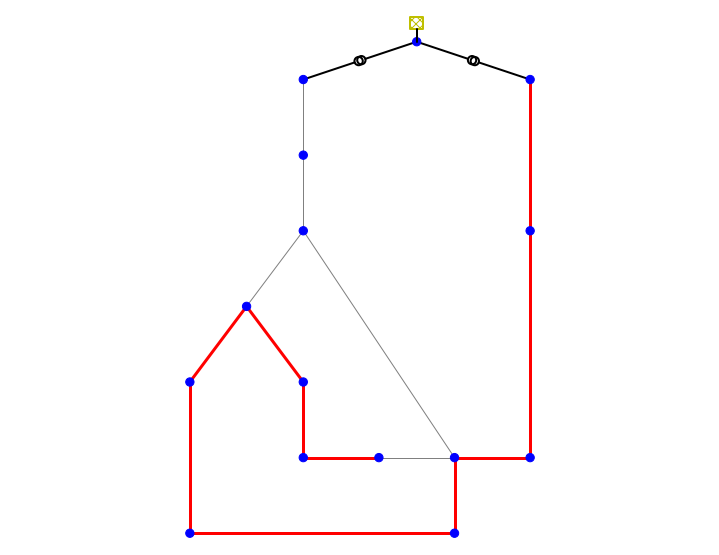

In [221]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplt
import matplotlib.pyplot as plt

# Step 1 Optimization Energy Networks


#-----------------------------    STEP 1.2    -----------------------

print("-----------------------------    STEP 1.2    -----------------------")

net = nw.create_cigre_network_mv()

net
vmax = 1.1
vmin = 0.9
max_ll = 100

lines = net.line.index 
N = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N.append(l)
        print("critical line")
        print(l)
        net.res_bus.vm_pu
        net.res_bus.vm_pu
        net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N)


print("-----------------------------    STEP 1.3    -----------------------")
#-----------------------------    STEP 1.3    -----------------------
net = nw.create_cigre_network_mv()

net
vmax_3 = 1.05
vmin_3 = 0.95
max_ll_3 = 100

lines = net.line.index 
N_3 = list()
overvoltage_line= list()
overvoltage_value= list()

undervoltage_line= list()
undervoltage_value= list()

overloaded_line= list()
overloaded_value= list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    overvoltage_line= list()
    overvoltage_value= list()

    undervoltage_line= list()
    undervoltage_value= list()

    overloaded_line= list()
    overloaded_value= list()
    
    check= list()
    
   # for c in (1,9)
    
    if net.res_bus.vm_pu.max() > vmax_3 or net.res_bus.vm_pu.min() < vmin_3 or net.res_line.loading_percent.max() > max_ll_3:
        N_3.append(l) 
        print("Disconnected line")
        print(l)
        #print("Bus voltage")
        #print(net.res_bus.vm_pu)
        #print("Loading percent")
        #print(net.res_line.loading_percent)
        
        for i in lines:
            if net.res_bus.vm_pu[i] > vmax_3:
                overvoltage_line.append(i)
                overvoltage_value.append(net.res_bus.vm_pu[i])
                
        overvoltage = overvoltage_line, overvoltage_value
        
        print("overvoltage")
        print(overvoltage)
        
        for i in lines:
            if net.res_bus.vm_pu[i] < vmin_3:
                undervoltage_line.append(i)
                undervoltage_value.append(net.res_bus.vm_pu[i])
                
        undervoltage = undervoltage_line, undervoltage_value
        
        print("Undervoltage")
        print(undervoltage)
        
        for i in lines:
            if net.res_line.loading_percent[i] > max_ll_3:
                overloaded_line.append(i)
                overloaded_value.append(net.res_line.loading_percent[i])
                
        overloaded = (overloaded_line, overloaded_value)
        
        print("Overloaded")
        print(overloaded)
      
        
    net.line.loc[l,"in_service"] = True
    print()
    
print("      Critical lines:")
print(N_3) 
    
ax = pplt.simple_plot(net, show_plot = False)
clc = pplt.create_line_collection(net, N_3, color ="r", linewidth = 3.,use_bus_geodata=(True))
pplt.draw_collections([clc], ax=ax)
plt.show()



In [222]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = True
net.switch.closed[2] = True
net.switch.closed[4] = True
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_1 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_1.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_1)

[0, 1, 10, 11, 14]


In [223]:
#print(net.switch.closed[1] )
#print(net.switch.closed[2] )
#print(net.switch.closed[4] )
net.switch

,bus,element,et,type,closed,name,z_ohm,in_ka
0,6,12,l,LBS,True,None,0.0,NaN
1,7,12,l,LBS,True,S2,0.0,NaN
2,4,13,l,LBS,True,S3,0.0,NaN
3,11,13,l,LBS,True,None,0.0,NaN
4,8,14,l,LBS,True,S1,0.0,NaN
5,14,14,l,LBS,True,None,0.0,NaN
6,0,0,t,CB,True,None,0.0,NaN
7,0,1,t,CB,True,None,0.0,NaN


In [224]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = False
net.switch.closed[2] = False
net.switch.closed[4] = False
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_2 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_2.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_2)

[3, 4, 5, 7, 8, 10, 11, 12, 13, 14]


In [225]:

net = nw.create_cigre_network_mv()
net.switch.closed[1] = False
net.switch.closed[2] = True
net.switch.closed[4] = True

net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_3 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_3.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_3)

[0, 1, 2, 10, 11, 14]


In [226]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = True
net.switch.closed[2] = False
net.switch.closed[4] = True
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_4 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_4.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_4)

[0, 1, 2, 10, 11, 14]


In [227]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = True
net.switch.closed[2] = True
net.switch.closed[4] = False
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_5 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_5.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_5)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [228]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = False
net.switch.closed[2] = False
net.switch.closed[4] = True
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_6 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_6.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_6)

[0, 1, 9, 10, 11, 14]


In [229]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = False
net.switch.closed[2] = True
net.switch.closed[4] = False
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_7 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_7.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_7)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [230]:


net = nw.create_cigre_network_mv()
net.switch.closed[1] = True
net.switch.closed[2] = False
net.switch.closed[4] = False
net
vmax = 1.05
vmin = 0.95
max_ll = 100

lines = net.line.index 
N_8 = list()

for l in lines:
    net.line.loc[l,"in_service"] = False
    pp.runpp(net)
    
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
        N_8.append(l)
        #print("critical line")
        #print(l)
        #net.res_bus.vm_pu
        #net.res_bus.vm_pu
        #net.res_line.loading_percent
        
    net.line.loc[l,"in_service"] = True
    
#ax = pplt.simple_plot(net, show_plot = False)
#clc = pplt.create_line_collection(net, N, color ="r", linewidth = 3.,use_bus_geodata=(True))
#pplt.draw_collections([clc], ax=ax)
#plt.show()
print(N_8)

[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]


In [265]:
print(N_1)
print(N_2)
print(N_3)
print(N_4)
print(N_5)
print(N_6)
print(N_7)
print(N_8)


[0, 1, 10, 11, 14]
[3, 4, 5, 7, 8, 10, 11, 12, 13, 14]
[0, 1, 2, 10, 11, 14]
[0, 1, 2, 10, 11, 14]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 9, 10, 11, 14]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]


In [308]:


crit= list()
for l in lines:       
        if l in N_1 and l in N_2  and l in N_3  and l in N_4  and l in N_5  and l in N_6  and l in N_7  and l in N_8 :
         crit.append(l)
print(crit)

[10, 11, 14]


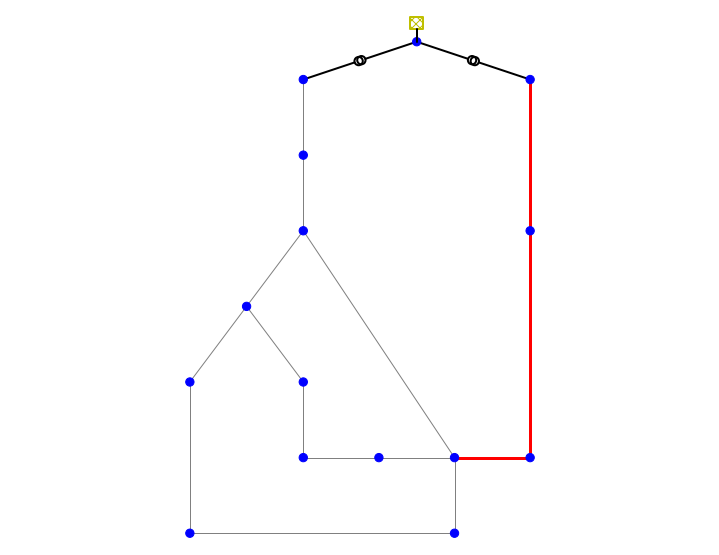

In [309]:
ax = pplt.simple_plot(net, show_plot = False)
clc = pplt.create_line_collection(net, crit, color ="r", linewidth = 3.,use_bus_geodata=(True))
pplt.draw_collections([clc], ax=ax)
plt.show()
